## Transfer Learning VGG 16 and VGG 19 using Keras

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Please download the dataset from the below url

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
#!nvidia-smi

In [4]:
#!pip install tensorflow-gpu

In [5]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.90
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from tensorflow.keras.layers import Dropout


In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = './dataset'
test_path = './test'


In [8]:
  # useful for getting number of output classes
folders = glob('./dataset/*')

In [10]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg16.layers:
    layer.trainable = False
x = Flatten()(vgg16.output)
x = Dense(256, activation = 'relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=vgg16.input,outputs=predictions)


In [11]:

# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [12]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=1e-5),
              loss='binary_crossentropy',
              metrics = ['accuracy'])


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 shuffle=True,
                                                 class_mode = 'binary')

Found 100000 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle=True,
                                            class_mode = 'binary')

Found 20000 images belonging to 2 classes.


In [16]:
filepath = "./capstone3/savedmodels/saved-model-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')

In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[checkpoint]
)

Epoch 1/20
3125/3125 [==============================] - ETA: 0s - loss: 0.1571 - accuracy: 0.9423
Epoch 00001: saving model to D:/New folder/capstone3/savedmodels\saved-model-01-0.97.h5
3125/3125 [==============================] - 5866s 2s/step - loss: 0.1571 - accuracy: 0.9423 - val_loss: 0.0833 - val_accuracy: 0.9711
Epoch 2/20
3125/3125 [==============================] - ETA: 0s - loss: 0.0810 - accuracy: 0.9721
Epoch 00002: saving model to D:/New folder/capstone3/savedmodels\saved-model-02-0.98.h5
3125/3125 [==============================] - 5054s 2s/step - loss: 0.0810 - accuracy: 0.9721 - val_loss: 0.0653 - val_accuracy: 0.9780
Epoch 3/20
3125/3125 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9793
Epoch 00003: saving model to D:/New folder/capstone3/savedmodels\saved-model-03-0.98.h5
3125/3125 [==============================] - 4952s 2s/step - loss: 0.0621 - accuracy: 0.9793 - val_loss: 0.0484 - val_accuracy: 0.9847
Epoch 4/20
3125/3125 [===============

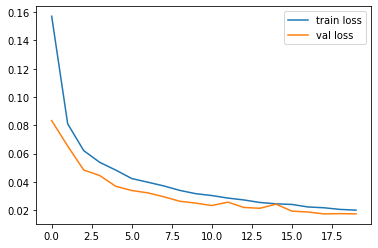

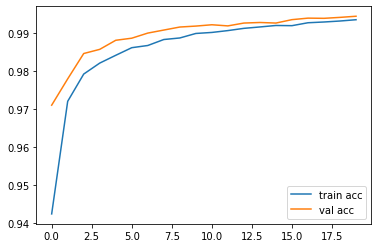

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16_final.h5')